In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../inputs/train.csv')

In [3]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
print (('%20s, %6s, %6s, %6s, %7s') % ('column', 'rows', 'uniq', 'nan', 'dtype'))
for col in df.columns.values.tolist():
    try:
        print (('%20s, %6d, %6d, %6d, %7s') % \
           (col, len(df), len(df[col].unique()), df[col].isnull().sum(), df.dtypes[col]))
    except KeyError:
        pass

              column,   rows,   uniq,    nan,   dtype
                  id,  43400,  43400,      0,   int64
              gender,  43400,      3,      0,  object
                 age,  43400,    104,      0, float64
        hypertension,  43400,      2,      0,   int64
       heart_disease,  43400,      2,      0,   int64
        ever_married,  43400,      2,      0,  object
           work_type,  43400,      5,      0,  object
      Residence_type,  43400,      2,      0,  object
   avg_glucose_level,  43400,  12543,      0, float64
                 bmi,  43400,    556,   1462, float64
      smoking_status,  43400,      4,  13292,  object
              stroke,  43400,      2,      0,   int64


In [5]:
# get the above table for test as well
df2 = pd.read_csv('../inputs/test.csv')
print (('%20s, %6s, %6s, %6s, %7s') % ('column', 'rows', 'uniq', 'nan', 'dtype'))
for col in df2.columns.values.tolist():
    try:
        print (('%20s, %6d, %6d, %6d, %7s') % \
           (col, len(df2), len(df2[col].unique()), df2[col].isnull().sum(), df2.dtypes[col]))
    except KeyError:
        pass
del df2

              column,   rows,   uniq,    nan,   dtype
                  id,  18601,  18601,      0,   int64
              gender,  18601,      3,      0,  object
                 age,  18601,    104,      0, float64
        hypertension,  18601,      2,      0,   int64
       heart_disease,  18601,      2,      0,   int64
        ever_married,  18601,      2,      0,  object
           work_type,  18601,      5,      0,  object
      Residence_type,  18601,      2,      0,  object
   avg_glucose_level,  18601,   8744,      0, float64
                 bmi,  18601,    501,    591, float64
      smoking_status,  18601,      4,   5751,  object


In [42]:
# target rate
print (df['stroke'].sum(), (100.0 * df['stroke'].sum())/len(df))

783 1.804147465437788


In [37]:
def age_buckets_fun(age):
    if age < 20:
        return ('0.[0,20)')
    if age < 45:
        return ('1.[20,45)')
    if age < 54:
        return ('2.[45,54)')
    if age < 65:
        return ('3.[54,65)')
    if age < 74:
        return ('4.[65,74)')
    if age < 84:
        return ('5.[75,84)')
    return ('6.[85,)')

def glucose_bucket_fun(glucose):
    if glucose < 80:
        return ('0.[0,80)')
    if glucose < 100:
        return ('1.[80,100)')
    if glucose < 200:
        return ('2.[100,200)')
    return ('3.[200,)')

def bmi_bucket_fun(bmi):
    if bmi < 18.5:
        return ('1.[,18.5)')
    if bmi < 24.9:
        return ('2.[18.5,24.9)')
    if bmi < 29.9:
        return ('3.[24.9,29.9)')
    return ('4.[29.9,)')

In [38]:
df['age_buckets'] = df['age'].apply(age_buckets_fun)
df['glucose_bucket'] = df['avg_glucose_level'].apply(glucose_bucket_fun)
df['bmi_bucket'] = df['bmi'].apply(bmi_bucket_fun)

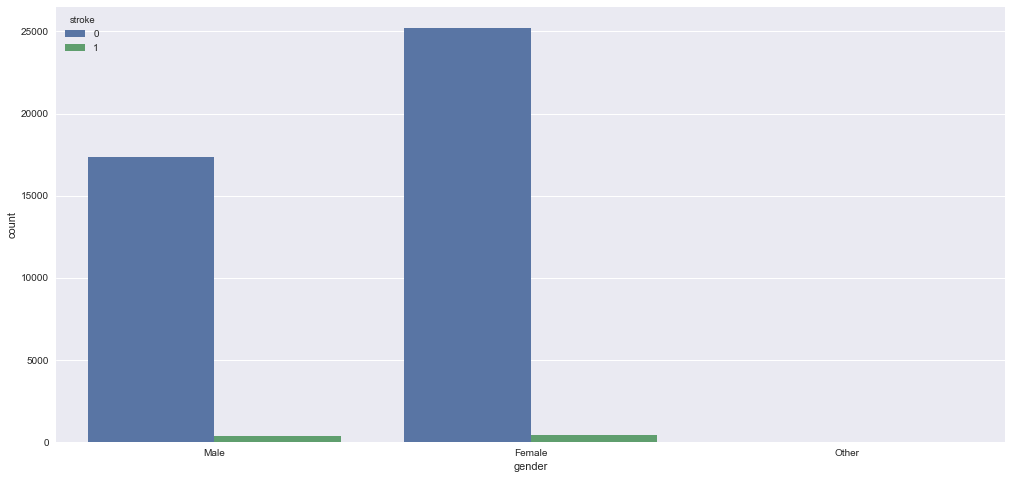

In [6]:
# gender
vars_to_plot = 'gender'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

In [43]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_buckets,glucose_bucket,bmi_bucket
2914,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,"1.[20,45)","2.[100,200)","2.[18.5,24.9)"
10768,26188,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never smoked,0,"2.[45,54)","1.[80,100)","4.[29.9,)"
15620,52984,Other,27.0,0,0,No,Private,Urban,62.45,NaN,smokes,0,"1.[20,45)","0.[0,80)","4.[29.9,)"
15838,24893,Other,53.0,0,0,Yes,Private,Rural,89.65,NaN,NaN,0,"2.[45,54)","1.[80,100)","4.[29.9,)"
19748,13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,formerly smoked,0,"1.[20,45)","1.[80,100)","4.[29.9,)"
21041,31015,Other,19.0,0,0,No,Private,Rural,75.76,32.2,formerly smoked,0,"0.[0,20)","0.[0,80)","4.[29.9,)"
21192,27043,Other,49.0,0,0,Yes,Private,Urban,94.88,37.2,never smoked,0,"2.[45,54)","1.[80,100)","4.[29.9,)"
24252,51111,Other,51.0,0,0,Yes,Private,Rural,91.75,32.2,formerly smoked,0,"2.[45,54)","1.[80,100)","4.[29.9,)"
26199,42452,Other,10.0,0,0,No,children,Rural,72.05,21.2,formerly smoked,0,"0.[0,20)","0.[0,80)","2.[18.5,24.9)"
26831,49812,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,NaN,NaN,0,"2.[45,54)","0.[0,80)","4.[29.9,)"


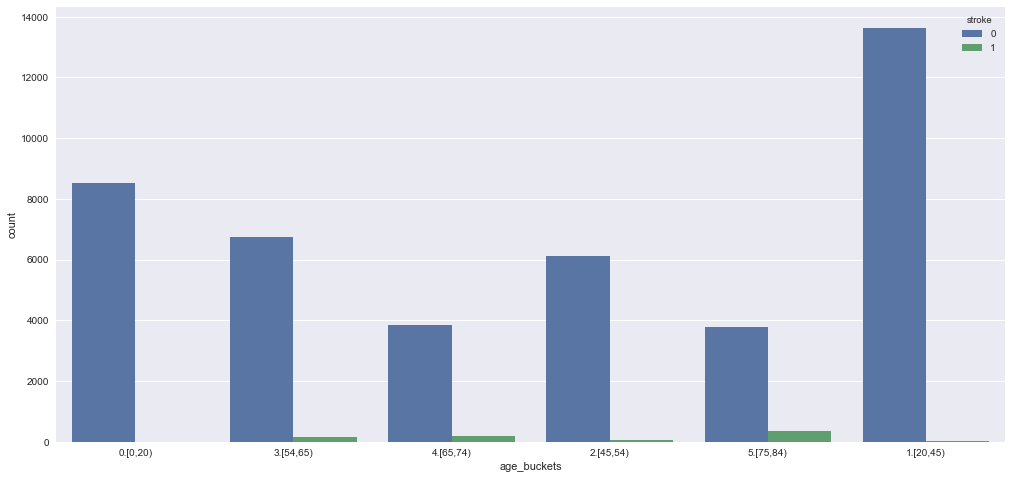

In [15]:
# age
vars_to_plot = 'age_buckets'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

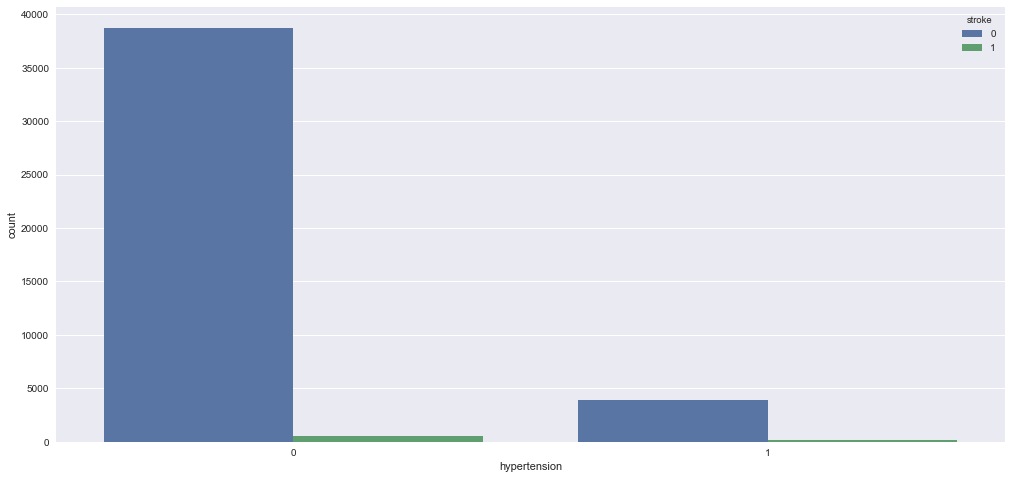

In [16]:
# hypertension
vars_to_plot = 'hypertension'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

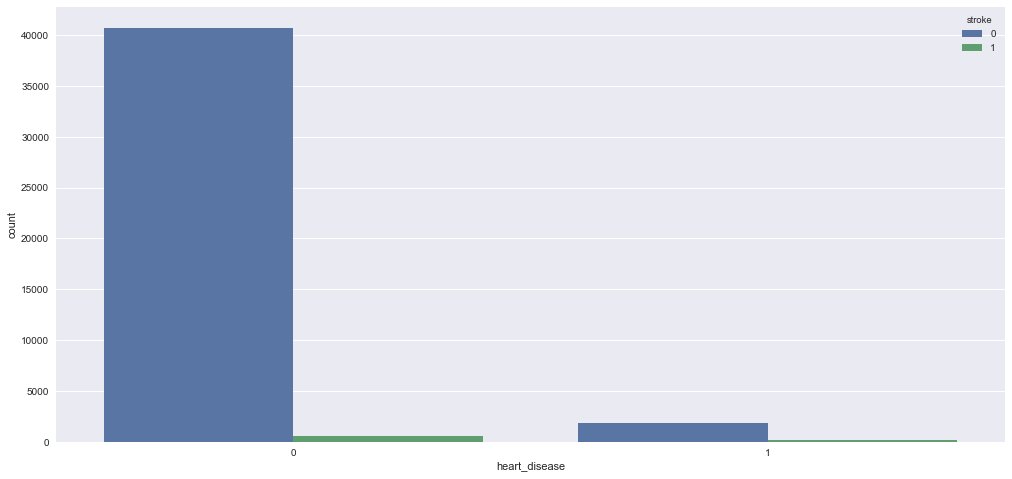

In [17]:
# heart_disease
vars_to_plot = 'heart_disease'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

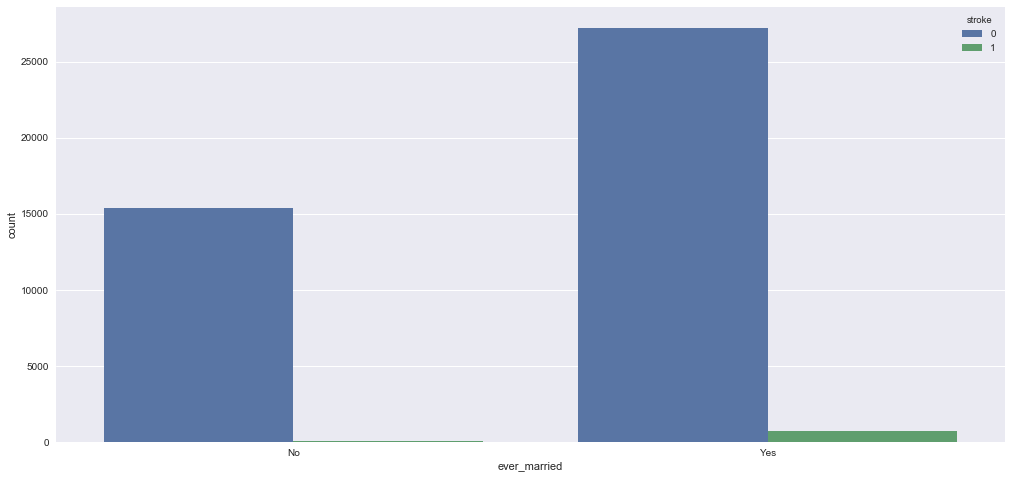

In [18]:
# ever_married
vars_to_plot = 'ever_married'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

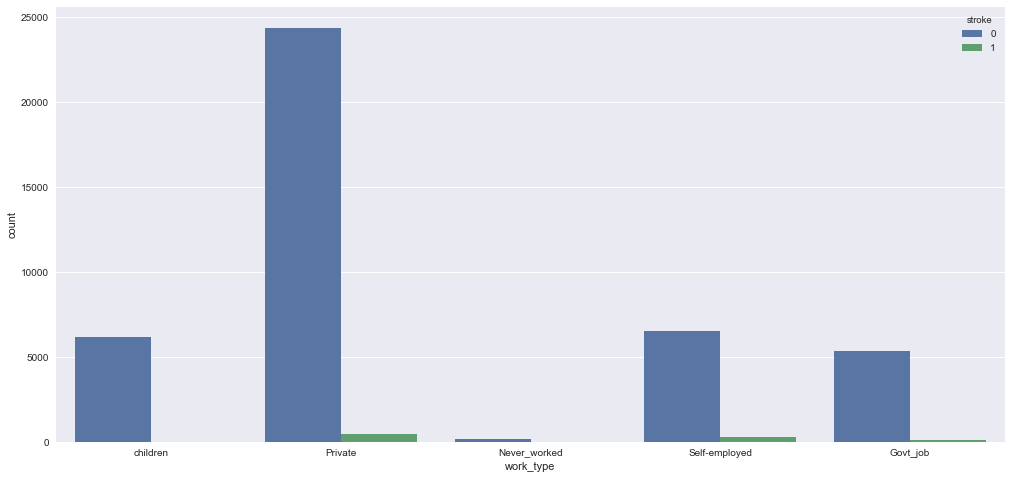

In [19]:
# work_type
vars_to_plot = 'work_type'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

In [44]:
df[df['work_type'] == 'Never_worked']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_buckets,glucose_bucket,bmi_bucket
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,"0.[0,20)","2.[100,200)","2.[18.5,24.9)"
362,61408,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0,"1.[20,45)","2.[100,200)","2.[18.5,24.9)"
650,13948,Female,19.0,0,0,No,Never_worked,Urban,86.96,25.8,never smoked,0,"0.[0,20)","1.[80,100)","3.[24.9,29.9)"
703,16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,NaN,0,"0.[0,20)","2.[100,200)","2.[18.5,24.9)"
723,56986,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0,"0.[0,20)","2.[100,200)","2.[18.5,24.9)"
1235,41870,Male,17.0,0,0,No,Never_worked,Rural,61.01,32.5,NaN,0,"0.[0,20)","0.[0,80)","4.[29.9,)"
1567,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0,"0.[0,20)","0.[0,80)","2.[18.5,24.9)"
1702,51935,Male,16.0,0,0,No,Never_worked,Urban,59.99,28.2,never smoked,0,"0.[0,20)","0.[0,80)","3.[24.9,29.9)"
2133,61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0,"0.[0,20)","2.[100,200)","2.[18.5,24.9)"
2511,23508,Female,17.0,0,0,No,Never_worked,Rural,88.57,31.1,never smoked,0,"0.[0,20)","1.[80,100)","4.[29.9,)"


In [45]:
print (df[df['work_type'] == 'Never_worked']['stroke'].sum())

0


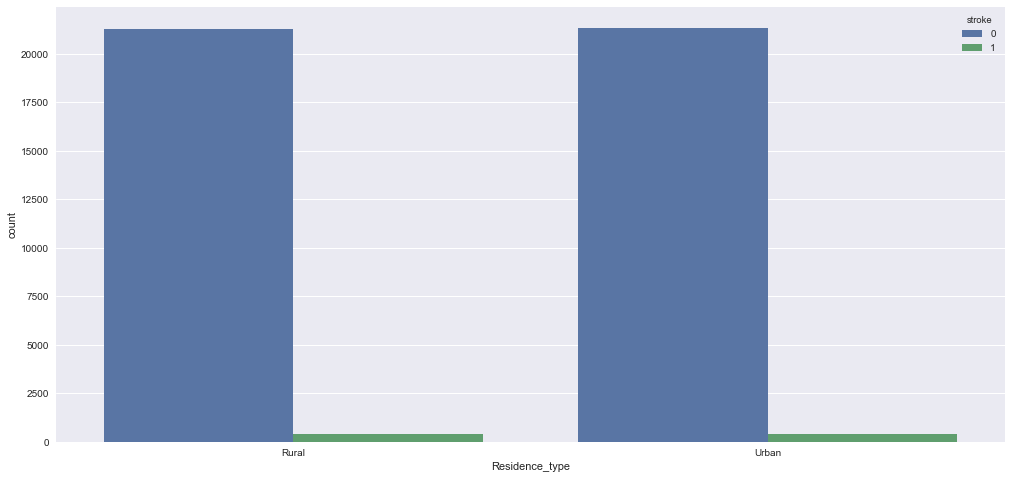

In [20]:
# Residence_type
vars_to_plot = 'Residence_type'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

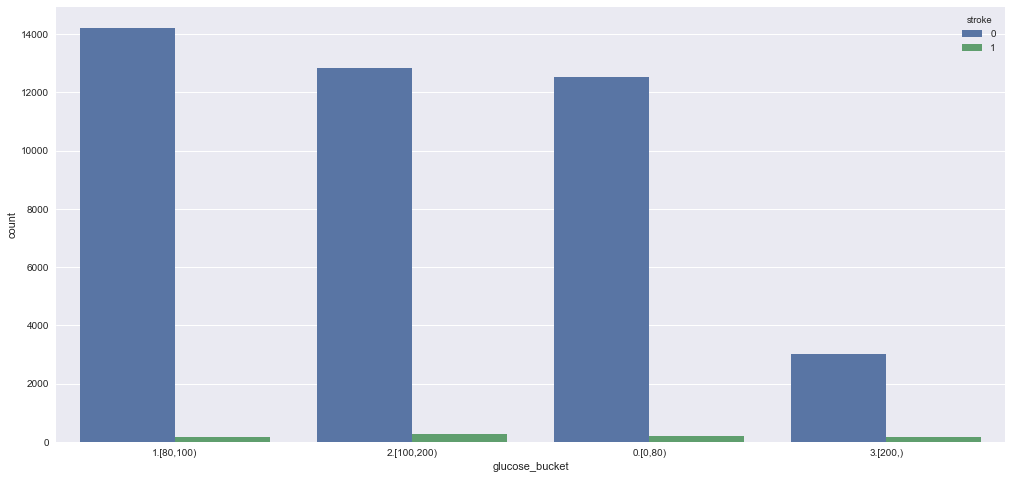

In [36]:
# avg_glucose_level
vars_to_plot = 'glucose_bucket'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

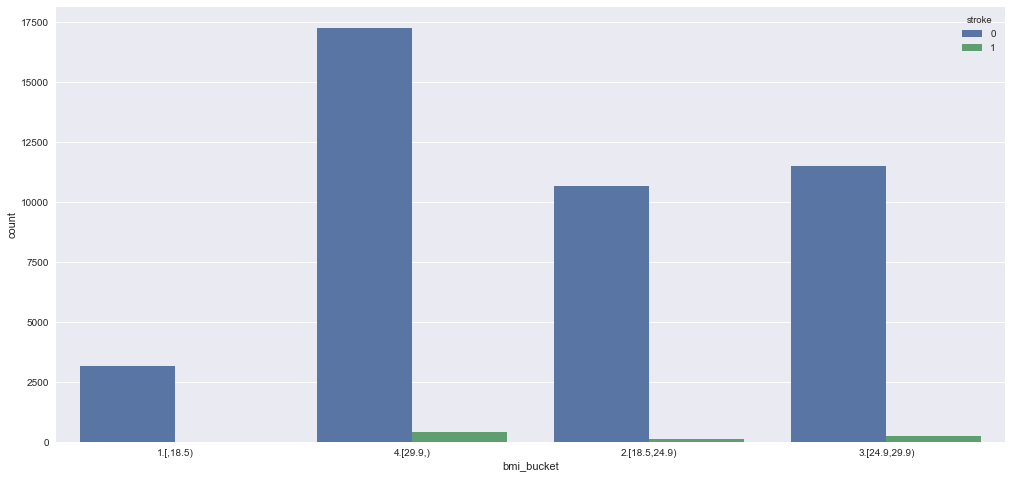

In [39]:
# bmi
vars_to_plot = 'bmi_bucket'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')

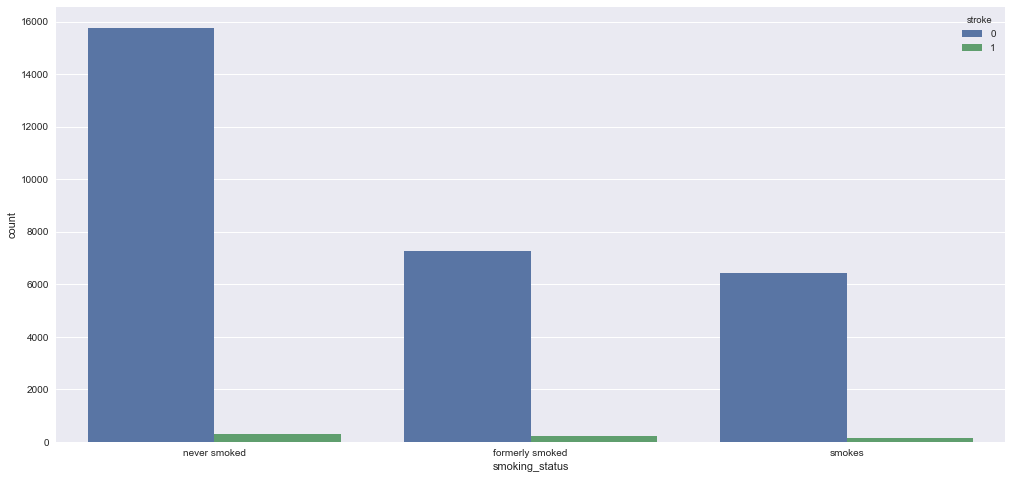

In [40]:
# smoke
vars_to_plot = 'smoking_status'
# ncols = 3
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(17 , 8))
# for i in range(len(vars_to_plot)):
sns.countplot(x = vars_to_plot, data = df, hue = 'stroke')